# Image compression using K-Means

- Compare to [the same task using PCA](https://colab.research.google.com/drive/1G_WPZMmQ020kjSmqMI_k21_zLDrPlYtg).
- If someone wanna use `git` to load the image, read [this example](https://note.dinhanhthi.com/files/ml/pca/pca-image-compression#Connecting-to-Git-and-working-with-it-(optional)).
- If someone wanna load and save images from Google Drive, read [this example](https://note.dinhanhthi.com/files/ml/pca/pca-image-compression).
- [K-Means on Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
- The codes of this example come from [here](https://dilloncamp.com/projects/kmeans.html) with my comments and explanations.


## Load the necessary libraries.

In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from skimage import io # for loading images
import imageio # export images to files

## Load image

Load an image as an example,


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


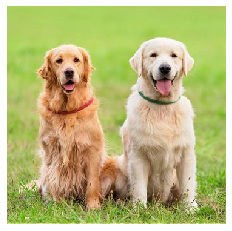

Img's shape:  (360, 361, 3)


In [3]:
fdir = '/content/drive/My Drive/Colab Notebooks/img/'
fname = fdir + 'golden_small.jpg'

img = io.imread(fname)
plt.axis('off') # don't show axes
plt.imshow(img)
plt.show()
print("Img's shape: ", img.shape)

Image's shape is $360\times 361 \times 3$ which means $height \times width \times channels$ (always 3 for RBG color images).

We need to rescale the array of image (whose range between 0 and 255) to (0,1) and then reshape it into $129960\times 3$ ($129960 = 360\times 361$) array so that each row represents a pixel and the three columns represent the **Red, Green, and Blue** values.

In [4]:
img_r = (img / 255.0).reshape(-1,3)
print("New shape (img_r): ", img_r.shape)

New shape (img_r):  (129960, 3)


## Run K-Means

Suppose that we want to convert image to the one having only 50 colors (`n_clusters=50`).

In [0]:
k_colors = KMeans(n_clusters=50).fit(img_r) # try with only 50 colors

Assign 50 colors to 129960 pixels based on their cluster centers: 

- Each row in `k_colors.cluster_centers_` represents the RGB value of a cluster centroid (50 colors).
- `k_colors.labels_` contains 129960 labels which are corresponding to labels showed in `k_colors.cluster_centers_`.

We wanna replace each pixel's original color by the new color defined in `k_colors.cluster_centers_`.

In [14]:
img50 = k_colors.cluster_centers_[k_colors.labels_]
print("k_colors.cluster_centers_'s shape: ", np.shape(k_colors.cluster_centers_))
print("k_colors.labels_'s shape: ", np.shape(k_colors.labels_))
print("img50 before reshape: ", img50.shape)
# Reshape back to 360x361x3
img50 = np.reshape(img50, (img.shape))
print("img50's shape: ", img50.shape)

k_colors.cluster_centers_'s shape:  (50, 3)
k_colors.labels_'s shape:  (129960,)
img50 before reshape:  (129960, 3)
img50's shape:  (360, 361, 3)


## Result

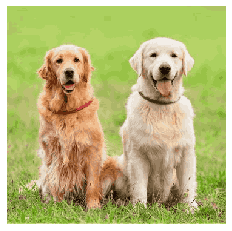

In [7]:
plt.axis('off') # don't show axes
plt.imshow(img50)
plt.show()

In [10]:
# save the result
# img50_uint8 = img50.astype('uint8') # pass: WARNING:root:Lossy conversion from float64 to uint8.
# imageio.imwrite(fdir + 'golden_small_50.jpg', img50_uint8)
imageio.imwrite(fdir + 'golden_small_50.jpg', img50)

**Comment**: Clearly, the result with only 50 colors is not so bad. It's almost the same as the original one.